# This File contains A end to end project from Chapter 2 of ML with Sci-kit learn 

<img src = "steps.PNG">

<h3>There are many websites where we get lot of datasets for free </h3>
<div>
    <li>UC Irvin Mahine Lerning Repo </li>
    <li>Kaggle Data sets </li>
    <li>AWS Data sets </li>
    <li>dataportals.org</li>
    <li>opendatamonitor</li>
    <li>Quandl</li>
    <li>Wikipedia's list of Mahine learning datasets</li>
</div>


In this we are Going to predict the Housing Price of city California 

<h3>Framing the problem</h3>

<li>Our main aim is to know what is the main aim of  our model and why are we building the model</li>
<li>Because , framing the aim in the beginnig will help to use which algorithm to use , what performance measure you use to evaluvate your model</li>
    

 <img src = "pipelines.PNG">

# Decide which algorith to use 

After framing the problem, as we have data set, by seeing dataset we should try to find which algorithm to use.  Ex : for predicting the Housing price we have to use Supervised machine learning and in supervised we have to use linear regression algorithm 



# Select A performane Measure 

Our next step is to select  a performance Measure, main used Performance measure in Regression is Root Mean Squared Error(RMSE)

<img src = "RMSE.PNG">

Even though RMSE is the most prefered performance measure for regression, but in some context you may prefer to use another function. Suppose if there are many outliers, we may prefer to use Mean Absolute error
<img src = "MAE.png">

# Get the Data 
Dataset for this Projet can be found at "https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.csv"

# Quick Look at the dataframe

In [2]:
#import all the required libraries 
import numpy as np #algebra
import pandas as pd #data analysis and manpulation 
import matplotlib.pyplot as plt #Visualization

In [3]:
housing = pd.read_csv("housing.csv")

In [5]:
housing.head() #first 5 rows of the dataset 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


each row represents the data of different district and each row has 10 different attributes like ["longitude lattitude etc...]

In [7]:
housing.info() #quick discription of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are about 20640 instances , this is small compared to what data scientists use, but good to get started with 



There are some missing values in the above information, like total_beadrooms = 20433, but it can be taken care later 

And we can also notice that, ocean_procimity is having non-interger type 

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A4900DA20>,
      dtype=object)

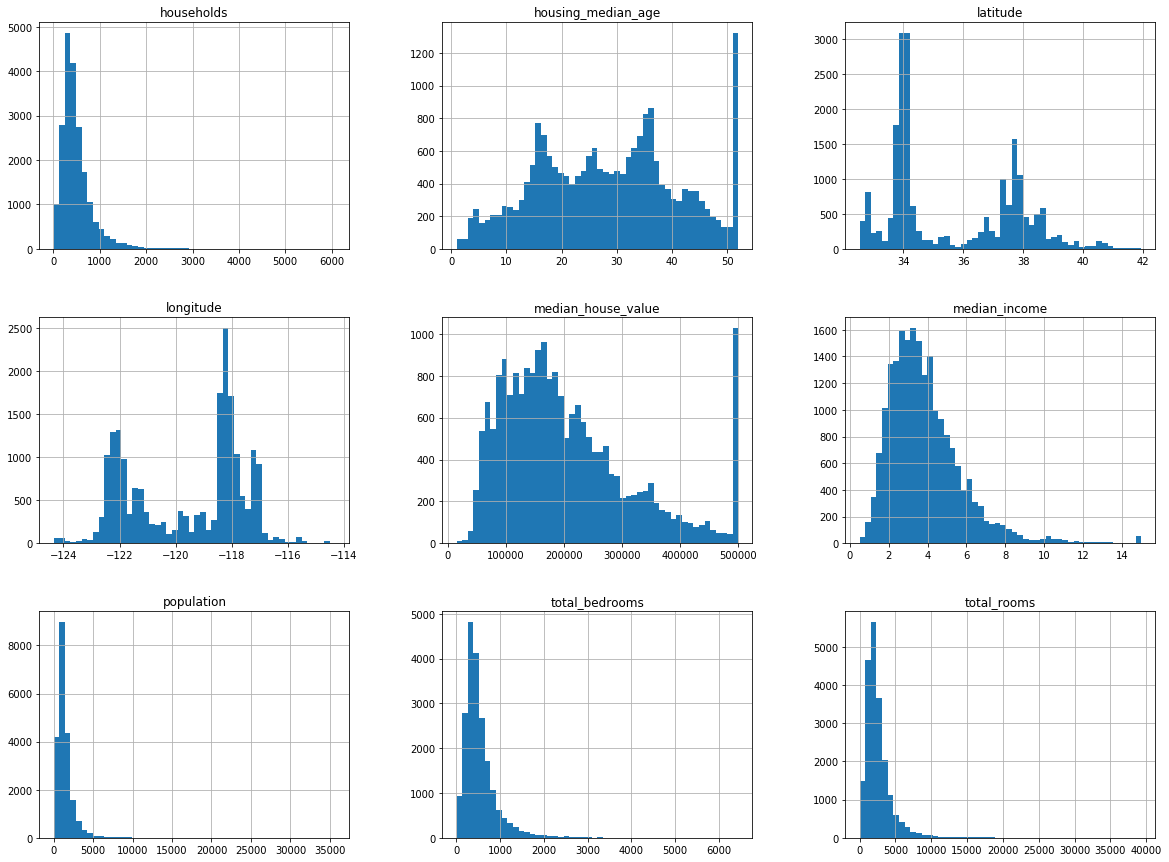

In [12]:
#another Quick way to get a feel of data is by plotting the histogram
housing.hist(bins = 50, figsize=(20,15))

In [15]:
#create testset 

In [13]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)#80% trains set and 20%test set 

In [17]:
print(len(train_set))

16512


In [18]:
print(len(test_set))

4128


But both these solutions will break next time you fetch an updated dataset. A common
solution is to use each instance’s identifier to decide whether or not it should go
in the test set (assuming instances have a unique and immutable identifier). For
example, you could compute a hash of each instance’s identifier, keep only the last
byte of the hash, and put the instance in the test set if this value is lower or equal to
51 (~20% of 256). This ensures that the test set will remain consistent across multiple
runs, even if you refresh the dataset. The new test set will contain 20% of the new
instances, but it will not contain any instance that was previously in the training set.
Here is a possible implementation:


In [19]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

<img src = "test_train_split.PNG">

In [20]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [21]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

So far from the cell "create testset" to now, everything can be just written with 2 lines of code 

In [23]:
#sklearn 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<img src = "median_income.PNG">

number of instances in your dataset for each stratum, or else the estimate of the stratum’s
importance may be biased. This means that you should not have too many strata, and
each stratum should be large enough. The following code creates an income category
attribute by dividing the median income by 1.5 (to limit the number of income categories),
and rounding up using ceil (to have discrete categories), and then merging
all the categories greater than 5 into category 5:

In [25]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [26]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

Now we are ready to do startified sampling based on income category 

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

Now you should remove the income_cat attribute so the data is back to its original
state:

In [30]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# Visualizing the geographical data

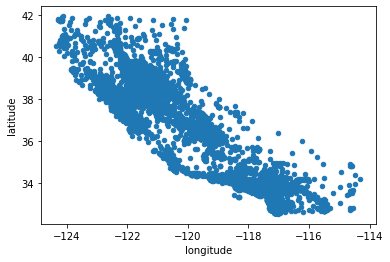

In [31]:
#scatterplot
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude')

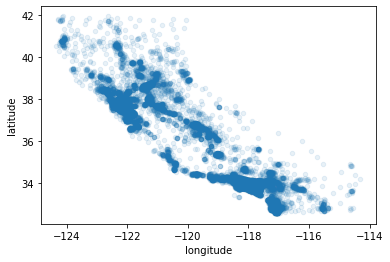

In [32]:
#the above map looks like california and to check the density put alpha = 0.1
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 0.1)

Now that’s much better: you can clearly see the high-density areas, namely the Bay
Area and around Los Angeles and San Diego, plus a long line of fairly high density in
the Central Valley, in particular around Sacramento and Fresno

Now let’s look at the housing prices (Figure 2-13). The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):

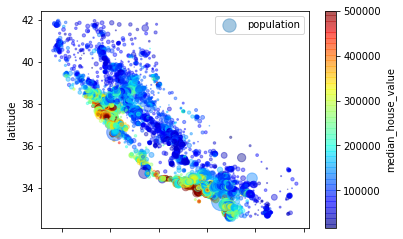

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [35]:
# looking for co-relations

In [36]:
corr_matrix = housing.corr()

In [37]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 11 numerical attributes, you would get 112 =121 plots, which would not fit on a page, so let’s just focus on a few promising
attributes that seem most correlated with the median housing value (Figure 2-15):

AttributeError: 'Line2D' object has no property 'figsize'

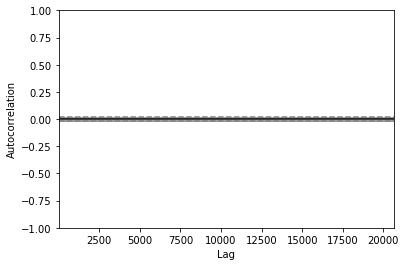

In [42]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
autocorrelation_plot(housing[attributes], figsize=(12, 8))